In [74]:
import pandas as pd
import numpy as np

In [75]:
energy = pd.read_csv('energy_LCL.csv')
len(energy)

3510568

In [76]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510568 entries, 0 to 3510567
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   day     object 
 1   LCLid   object 
 2   energy  float64
dtypes: float64(1), object(2)
memory usage: 80.4+ MB


In [77]:
energy.shape

(3510568, 3)

In [78]:
energy['day'] = pd.to_datetime(energy.day)

In [79]:
energy = energy.rename(columns={"energy": "energy_sum"})
energy.head(5)

,day,LCLid,energy_sum
0,2012-10-12,MAC000002,7.098
1,2012-10-13,MAC000002,11.087
2,2012-10-14,MAC000002,13.223
3,2012-10-15,MAC000002,10.257
4,2012-10-16,MAC000002,9.769


In [80]:
housecount = energy.groupby('day')[['LCLid']].nunique()
housecount.head(4)

,LCLid
day,
2011-11-23,13
2011-11-24,25
2011-11-25,32
2011-11-26,41


In [81]:
housecount.rename(columns={"LCLid": "HouseCount"}, inplace=True)
housecount

,HouseCount
day,
2011-11-23,13
2011-11-24,25
2011-11-25,32
2011-11-26,41
2011-11-27,41
...,...
2014-02-24,4994
2014-02-25,4995
2014-02-26,4993


<AxesSubplot:xlabel='day'>

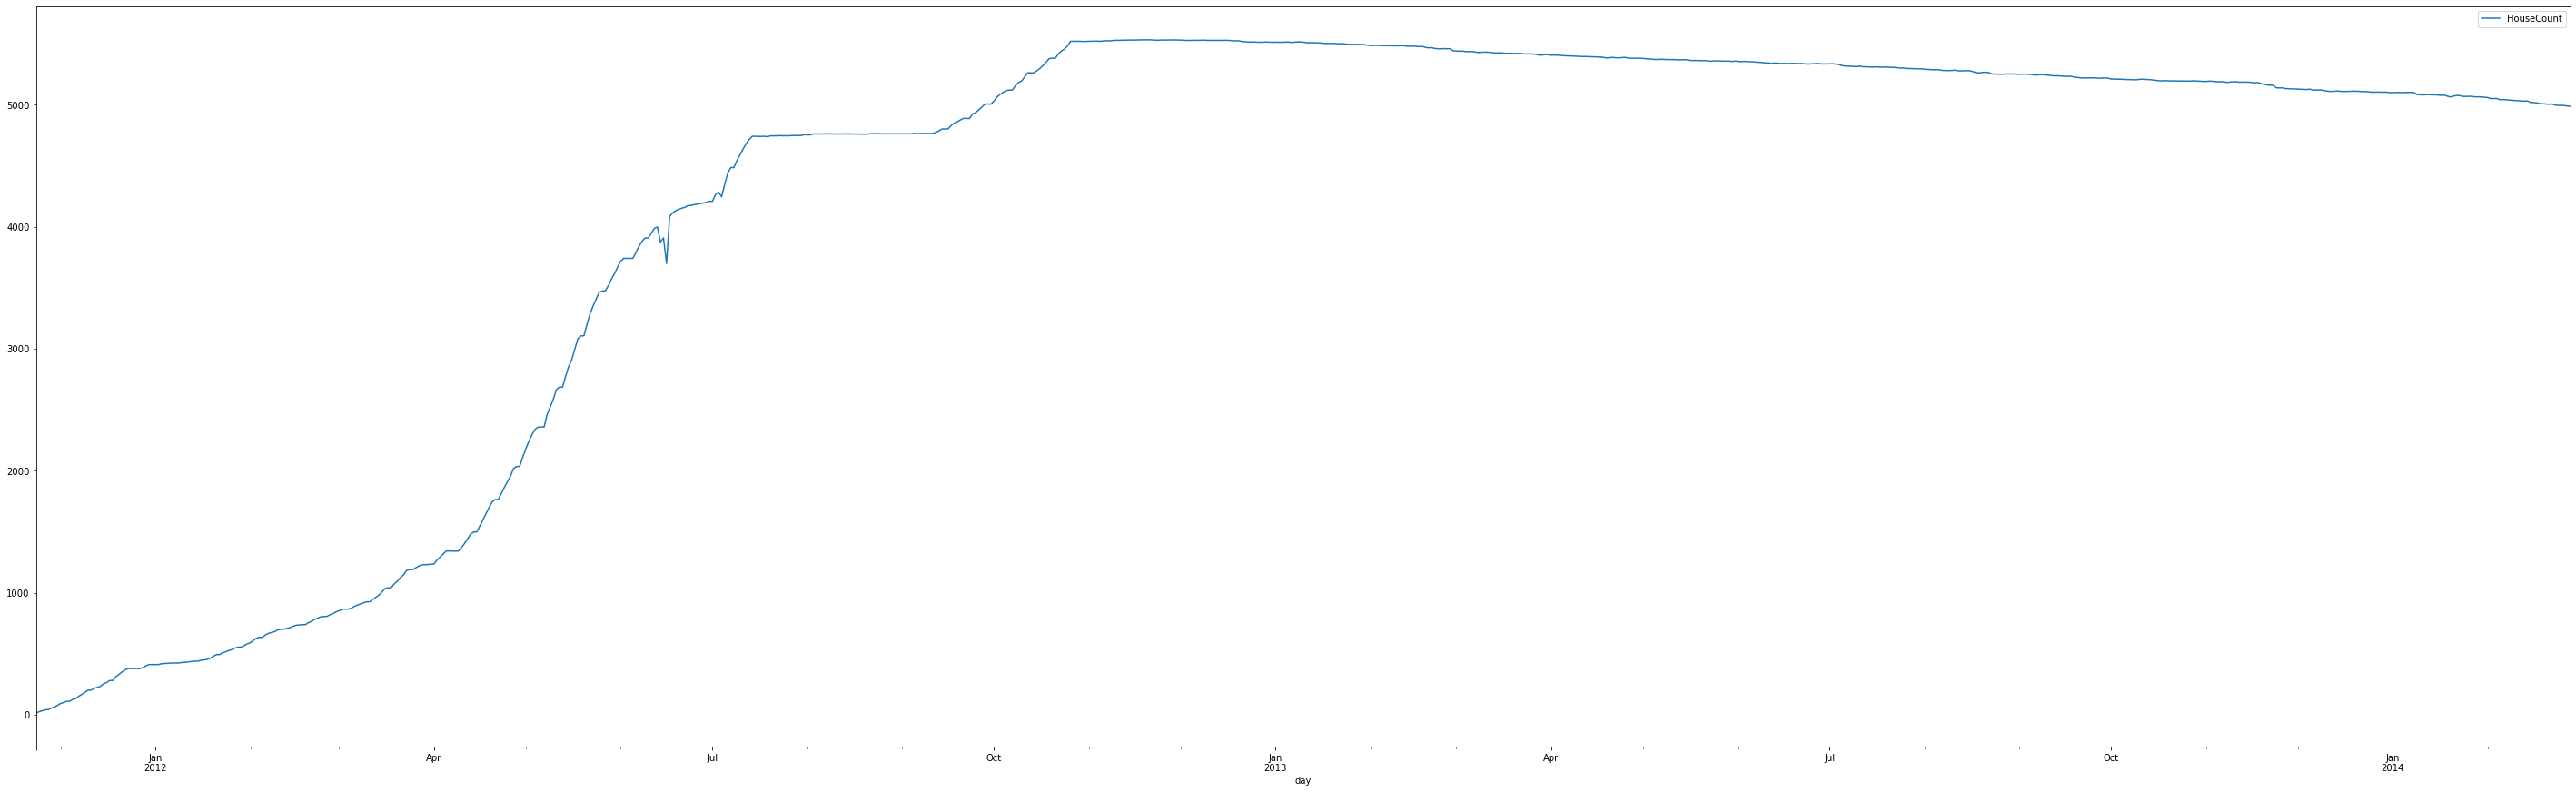

In [82]:
housecount.plot(figsize=(50,15))

In [83]:
energy_per_house = energy.groupby('day')[['energy_sum']].sum()
energy_per_house = energy_per_house.merge(housecount, on = ['day'])
energy_per_house = energy_per_house.reset_index()

In [84]:
energy_per_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   day         829 non-null    datetime64[ns]
 1   energy_sum  829 non-null    float64       
 2   HouseCount  829 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 19.6 KB


In [85]:
energy_per_house.describe()

,energy_sum,HouseCount
count,829.000000,829.000000
mean,42895.909132,4234.503016
std,20152.110830,1789.969230
min,90.385000,13.000000
25%,34439.920000,4084.000000
50%,45972.851997,5138.000000
75%,58860.151998,5369.000000
max,82650.492003,5532.000000


In [86]:
energy_per_house= energy_per_house[:-1]

In [87]:
energy_per_house['avg_energy'] =  energy_per_house['energy_sum']/energy_per_house['HouseCount']
print("Starting Point of Data at Day Level",min(energy_per_house.day))
print("Ending Point of Data at Day Level",max(energy_per_house.day))

Starting Point of Data at Day Level 2011-11-23 00:00:00
Ending Point of Data at Day Level 2014-02-27 00:00:00


In [88]:
energy_per_house= energy_per_house[:-1]

In [89]:
energy_per_house.head()

,day,energy_sum,HouseCount,avg_energy
0,2011-11-23,90.385000,13,6.952692
1,2011-11-24,213.412000,25,8.536480
2,2011-11-25,303.993000,32,9.499781
3,2011-11-26,420.976000,41,10.267707
4,2011-11-27,444.883001,41,10.850805


In [90]:
#energy_per_house.energy_sum.plot(figsize=(50,15))
from plotly.subplots import make_subplots
import plotly.graph_objs as go
fig = make_subplots(rows=3, cols=3)
columns  = energy_per_house.columns
columns = columns.delete(0)

columns
for i in columns:
   
    fig = make_subplots(rows=1, cols=1)
    fig.add_trace(
        go.Scatter(x=energy_per_house['day'], y=energy_per_house[i],name=i),
        row=1, col=1
    )
    fig.update_layout(height=400, width=1000, title_text=i)
    fig.show()

In [91]:
#energy_per_house.avg_energy.plot(figsize=(50,15))

In [92]:
weather = pd.read_csv("/Users/avitr/OneDrive/Desktop/archive (2)/code/weather_data/london.csv")
weather['day']=  pd.to_datetime(weather['date_time'])
weather.head(4)

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,day
0,2011-11-01,15,10,0.0,8.7,3,35,01:40 PM,10:53 PM,07:53 AM,...,42,87,0.5,1009,15,9,206,12,london,2011-11-01
1,2011-11-02,15,9,0.0,7.0,3,42,02:07 PM,No moonset,07:55 AM,...,46,89,1.2,1005,15,9,143,18,london,2011-11-02
2,2011-11-03,18,13,0.0,7.0,4,49,02:29 PM,12:05 AM,07:57 AM,...,58,92,2.8,993,18,6,155,16,london,2011-11-03
3,2011-11-04,16,11,0.0,5.3,3,56,02:49 PM,01:15 AM,07:59 AM,...,72,92,8.7,995,16,7,174,13,london,2011-11-04


In [93]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_time          881 non-null    object        
 1   maxtempC           881 non-null    int64         
 2   mintempC           881 non-null    int64         
 3   totalSnow_cm       881 non-null    float64       
 4   sunHour            881 non-null    float64       
 5   uvIndex            881 non-null    int64         
 6   moon_illumination  881 non-null    int64         
 7   moonrise           881 non-null    object        
 8   moonset            881 non-null    object        
 9   sunrise            881 non-null    object        
 10  sunset             881 non-null    object        
 11  DewPointC          881 non-null    int64         
 12  FeelsLikeC         881 non-null    int64         
 13  HeatIndexC         881 non-null    int64         
 14  WindChillC

In [94]:
weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,day
0,2011-11-01,15,10,0.0,8.7,3,35,01:40 PM,10:53 PM,07:53 AM,...,42,87,0.5,1009,15,9,206,12,london,2011-11-01
1,2011-11-02,15,9,0.0,7.0,3,42,02:07 PM,No moonset,07:55 AM,...,46,89,1.2,1005,15,9,143,18,london,2011-11-02
2,2011-11-03,18,13,0.0,7.0,4,49,02:29 PM,12:05 AM,07:57 AM,...,58,92,2.8,993,18,6,155,16,london,2011-11-03
3,2011-11-04,16,11,0.0,5.3,3,56,02:49 PM,01:15 AM,07:59 AM,...,72,92,8.7,995,16,7,174,13,london,2011-11-04
4,2011-11-05,14,11,0.0,7.0,3,62,03:07 PM,02:22 AM,08:00 AM,...,56,93,0.8,1006,14,6,273,12,london,2011-11-05


In [95]:
weather = weather.drop(['moonrise','moonset','sunrise','sunset','location','date_time'],axis =1 )
weather = weather.dropna()

In [96]:
weather_energy =  energy_per_house.merge(weather,on='day')
weather_energy.set_index('day',inplace=True)
weather_energy.head(2)

,energy_sum,HouseCount,avg_energy,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
day,,,,,,,,,,,,,,,,,,,,,
2011-11-23,90.385,13,6.952692,10,5,0.0,8.7,2,16,6,...,5,18,25,90,0.0,1027,10,7,257,10
2011-11-24,213.412,25,8.536480,13,8,0.0,8.7,3,9,8,...,7,30,45,92,0.0,1028,13,10,205,16


In [97]:
weather_energy.drop(['HouseCount','energy_sum'],axis = 1,inplace=True)
weather_energy.head(2)

,avg_energy,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
day,,,,,,,,,,,,,,,,,,,,
2011-11-23,6.952692,10,5,0.0,8.7,2,16,6,5,7,5,18,25,90,0.0,1027,10,7,257,10
2011-11-24,8.536480,13,8,0.0,8.7,3,9,8,7,9,7,30,45,92,0.0,1028,13,10,205,16


In [98]:
holiday = pd.read_csv('uk_bank_holidays.csv')
holiday.rename(columns={"Bank holidays":"day"})
holiday.columns = ["day","Type"]

In [99]:
holiday['day'] = pd.to_datetime(holiday['day'],format='%Y-%m-%d').dt.date
holiday.head(4)

,day,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)


In [100]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     25 non-null     object
 1   Type    25 non-null     object
dtypes: object(2)
memory usage: 528.0+ bytes


In [101]:
holiday['day'] = pd.to_datetime(holiday.day)

In [102]:
weather_energy_holiday = weather_energy.merge(holiday, left_on = 'day',right_on = 'day',how = 'left')

In [103]:
weather_energy_holiday

,day,avg_energy,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,Type
0,2011-11-23,6.952692,10,5,0.0,8.7,2,16,6,5,...,18,25,90,0.0,1027,10,7,257,10,NaN
1,2011-11-24,8.536480,13,8,0.0,8.7,3,9,8,7,...,30,45,92,0.0,1028,13,10,205,16,NaN
2,2011-11-25,9.499781,12,7,0.0,8.7,2,2,8,7,...,31,44,87,0.2,1024,12,9,240,19,NaN
3,2011-11-26,10.267707,12,6,0.0,8.2,3,5,7,6,...,35,30,90,0.0,1026,12,10,229,20,NaN
4,2011-11-27,10.850805,12,6,0.0,6.8,3,11,8,8,...,36,38,85,0.3,1021,12,10,258,22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,2014-02-22,10.776242,10,3,0.0,10.3,3,48,3,2,...,32,27,84,0.0,1009,10,10,223,19,NaN
823,2014-02-23,11.480411,12,6,0.0,6.9,2,42,7,5,...,44,66,91,0.3,1011,12,9,186,27,NaN
824,2014-02-24,10.411403,13,6,0.0,8.5,2,35,6,6,...,35,44,85,0.1,1006,13,10,175,21,NaN
825,2014-02-25,10.294997,10,5,0.0,10.0,2,28,6,4,...,34,54,87,1.1,1001,10,9,186,22,NaN


In [104]:
weather_energy_holiday['Isholiday'] = np.where(weather_energy_holiday['Type'].isna(),0,1)
weather_energy_holiday

,day,avg_energy,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,Type,Isholiday
0,2011-11-23,6.952692,10,5,0.0,8.7,2,16,6,5,...,25,90,0.0,1027,10,7,257,10,NaN,0
1,2011-11-24,8.536480,13,8,0.0,8.7,3,9,8,7,...,45,92,0.0,1028,13,10,205,16,NaN,0
2,2011-11-25,9.499781,12,7,0.0,8.7,2,2,8,7,...,44,87,0.2,1024,12,9,240,19,NaN,0
3,2011-11-26,10.267707,12,6,0.0,8.2,3,5,7,6,...,30,90,0.0,1026,12,10,229,20,NaN,0
4,2011-11-27,10.850805,12,6,0.0,6.8,3,11,8,8,...,38,85,0.3,1021,12,10,258,22,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,2014-02-22,10.776242,10,3,0.0,10.3,3,48,3,2,...,27,84,0.0,1009,10,10,223,19,NaN,0
823,2014-02-23,11.480411,12,6,0.0,6.9,2,42,7,5,...,66,91,0.3,1011,12,9,186,27,NaN,0
824,2014-02-24,10.411403,13,6,0.0,8.5,2,35,6,6,...,44,85,0.1,1006,13,10,175,21,NaN,0
825,2014-02-25,10.294997,10,5,0.0,10.0,2,28,6,4,...,54,87,1.1,1001,10,9,186,22,NaN,0


In [105]:
weather_energy_holiday['DayOfWeek'] = pd.to_datetime(weather_energy_holiday['day']).dt.dayofweek  # monday = 0, sunday = 6
weather_energy_holiday['Isweekend'] = 0          # Initialize the column with default value of 0
weather_energy_holiday.loc[weather_energy_holiday['DayOfWeek'].isin([5, 6]), 'Isweekend'] = 1  # 5 and 6 correspond to Sat and Sun
weather_energy_holiday["IsBankHoliday"] = weather_energy_holiday["Isholiday"]+weather_energy_holiday["Isweekend"]
weather_energy_holiday.loc[weather_energy_holiday["IsBankHoliday"]==2, ["IsBankHoliday"]]=1

In [106]:
weather_energy_holiday

,day,avg_energy,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,...,pressure,tempC,visibility,winddirDegree,windspeedKmph,Type,Isholiday,DayOfWeek,Isweekend,IsBankHoliday
0,2011-11-23,6.952692,10,5,0.0,8.7,2,16,6,5,...,1027,10,7,257,10,NaN,0,2,0,0
1,2011-11-24,8.536480,13,8,0.0,8.7,3,9,8,7,...,1028,13,10,205,16,NaN,0,3,0,0
2,2011-11-25,9.499781,12,7,0.0,8.7,2,2,8,7,...,1024,12,9,240,19,NaN,0,4,0,0
3,2011-11-26,10.267707,12,6,0.0,8.2,3,5,7,6,...,1026,12,10,229,20,NaN,0,5,1,1
4,2011-11-27,10.850805,12,6,0.0,6.8,3,11,8,8,...,1021,12,10,258,22,NaN,0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,2014-02-22,10.776242,10,3,0.0,10.3,3,48,3,2,...,1009,10,10,223,19,NaN,0,5,1,1
823,2014-02-23,11.480411,12,6,0.0,6.9,2,42,7,5,...,1011,12,9,186,27,NaN,0,6,1,1
824,2014-02-24,10.411403,13,6,0.0,8.5,2,35,6,6,...,1006,13,10,175,21,NaN,0,0,0,0
825,2014-02-25,10.294997,10,5,0.0,10.0,2,28,6,4,...,1001,10,9,186,22,NaN,0,1,0,0


In [107]:
weather_energy_holiday.drop(['Isholiday','Isweekend','Type','DayOfWeek'],axis=1,inplace=True)

In [108]:
weather_energy_holiday

,day,avg_energy,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,IsBankHoliday
0,2011-11-23,6.952692,10,5,0.0,8.7,2,16,6,5,...,18,25,90,0.0,1027,10,7,257,10,0
1,2011-11-24,8.536480,13,8,0.0,8.7,3,9,8,7,...,30,45,92,0.0,1028,13,10,205,16,0
2,2011-11-25,9.499781,12,7,0.0,8.7,2,2,8,7,...,31,44,87,0.2,1024,12,9,240,19,0
3,2011-11-26,10.267707,12,6,0.0,8.2,3,5,7,6,...,35,30,90,0.0,1026,12,10,229,20,1
4,2011-11-27,10.850805,12,6,0.0,6.8,3,11,8,8,...,36,38,85,0.3,1021,12,10,258,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,2014-02-22,10.776242,10,3,0.0,10.3,3,48,3,2,...,32,27,84,0.0,1009,10,10,223,19,1
823,2014-02-23,11.480411,12,6,0.0,6.9,2,42,7,5,...,44,66,91,0.3,1011,12,9,186,27,1
824,2014-02-24,10.411403,13,6,0.0,8.5,2,35,6,6,...,35,44,85,0.1,1006,13,10,175,21,0
825,2014-02-25,10.294997,10,5,0.0,10.0,2,28,6,4,...,34,54,87,1.1,1001,10,9,186,22,0


In [109]:
weather_energy_holiday.to_csv("weather_energy_holiday(w_LCL).csv",index=False)

In [110]:
weather_energy_holiday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 826
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   day                827 non-null    datetime64[ns]
 1   avg_energy         827 non-null    float64       
 2   maxtempC           827 non-null    int64         
 3   mintempC           827 non-null    int64         
 4   totalSnow_cm       827 non-null    float64       
 5   sunHour            827 non-null    float64       
 6   uvIndex            827 non-null    int64         
 7   moon_illumination  827 non-null    int64         
 8   DewPointC          827 non-null    int64         
 9   FeelsLikeC         827 non-null    int64         
 10  HeatIndexC         827 non-null    int64         
 11  WindChillC         827 non-null    int64         
 12  WindGustKmph       827 non-null    int64         
 13  cloudcover         827 non-null    int64         
 14  humidity  